In [2]:
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pylab as plt 
import matplotlib.lines as mlines
from matplotlib.legend import Legend
from pythonds.basic.stack import Stack
from math import *
from sklearn.neighbors import KDTree
from lrg_plot_functions import *
from lrg_sum_functions import *
from cosmo_Calc import *
from divideByTwo import *
from read_data import *
from nearNeighbors import *
from scipy import stats
from astropy import stats
import healpy as hp
from localBKG_and_interlopersHEALPix import *
# import healpy as hpy
from makeCutoutTableFunc import *
from plotHistogramProjections3D import *
from read_bricks import *
from mpl_toolkits.axes_grid1 import make_axes_locatable
import random

In [3]:
# read in unmasked null and measured results

# null results for lowz bin only
data_Nsat_low = np.load('/Users/mtownsend/Documents/LRG_Data/low_Nsat_null.npz')
low_Nsat_total = data_Nsat_low['Nsat']
null_Nsat_low35 = data_Nsat_low['low_Nsat35']
print(null_Nsat_low35.shape)


data_Nsat = np.load('/Users/mtownsend/Documents/LRG_Data/data_Nsat.npz')
Nsat_total = data_Nsat['Nsat']
Nsat35 = data_Nsat['data_Nsat35']
Nsat05 = data_Nsat['data_Nsat05']
Nsat65 = data_Nsat['data_Nsat65']

print(Nsat_total.shape)
print(Nsat35.shape)
print(Nsat05.shape)
print(Nsat65.shape)



(5000, 49, 49, 49)
(1823, 49, 49, 49)
(309, 49, 49, 49)
(617, 49, 49, 49)
(897, 49, 49, 49)


In [5]:
# read selection matrices

# read in selection matrices

# lowz
smatrix_low = np.load('/Users/mtownsend/Desktop/lowz_smatrix-1matrices-v2.npz')
low_smatrix = smatrix_low['smatrix']
smatrix_low35 = low_smatrix[0]
# print(smatrix_low35.shape)

# print()
# print()

# midz
smatrix_mid = np.load('/Users/mtownsend/Desktop/midz_smatrix-2matrices-v2.npz')
mid_smatrix = smatrix_mid['smatrix']
smatrix_mid35 = mid_smatrix[0]
smatrix_mid05 = mid_smatrix[1]
# print(smatrix_mid35.shape)
# print(smatrix_mid05.shape)

# print()
# print()

# highz
smatrix_high = np.load('/Users/mtownsend/Desktop/highz_smatrix-3matrices-v2.npz')
high_smatrix = smatrix_high['smatrix']
smatrix_high35 = high_smatrix[0]
smatrix_high05 = high_smatrix[1]
smatrix_high65 = high_smatrix[2]
# print(smatrix_high35.shape)
# print(smatrix_high05.shape)
# print(smatrix_high65.shape)

In [6]:
# mask data and null

# apply masks

# data
masked_Nsat35 = []
for i in range(len(Nsat35)):
    masked_Nsat35.append(Nsat35[i] * smatrix_low35)

print(np.asarray(masked_Nsat35).shape)

# null
masked_Nsat_null35 = []
for i in range(len(null_Nsat_low35)):
    masked_Nsat_null35.append(null_Nsat_low35[i] * smatrix_low35)
    
print(np.asarray(masked_Nsat_null35).shape)



(309, 49, 49, 49)
(5000, 49, 49, 49)


In [8]:
# read in models

# lowz models are masked

data1 = np.load('/Users/mtownsend/Documents/LRG_Data/low_model1_Nsat35-masked.npz')
masked_Nsat1 = data1['masked_Nsat_low35_mod1']

print(masked_Nsat1.shape)

data2 = np.load('/Users/mtownsend/Documents/LRG_Data/low_model2_Nsat35-masked.npz')
masked_Nsat2 = data2['masked_Nsat_low35_mod2']

print(masked_Nsat2.shape)

data3 = np.load('/Users/mtownsend/Documents/LRG_Data/low_model3_Nsat35-masked.npz')
masked_Nsat3 = data3['masked_Nsat_low35_mod3']

print(masked_Nsat3.shape)

data4 = np.load('/Users/mtownsend/Documents/LRG_Data/low_model4_Nsat35-masked.npz')
masked_Nsat4 = data4['masked_Nsat_low35_mod4']

print(masked_Nsat4.shape)

data5 = np.load('/Users/mtownsend/Documents/LRG_Data/low_model5_Nsat35-masked.npz')
masked_Nsat5 = data5['masked_Nsat_low35_mod5']

print(masked_Nsat5.shape)

data6 = np.load('/Users/mtownsend/Documents/LRG_Data/low_model6_Nsat35-masked.npz')
masked_Nsat6 = data6['masked_Nsat_low35_mod6']

print(masked_Nsat6.shape)

data7 = np.load('/Users/mtownsend/Documents/LRG_Data/low_model7_Nsat35-masked.npz')
masked_Nsat7 = data7['masked_Nsat_low35_mod7']

print(masked_Nsat7.shape)

data8 = np.load('/Users/mtownsend/Documents/LRG_Data/low_model8_Nsat35-masked.npz')
masked_Nsat8 = data8['masked_Nsat_low35_mod8']

print(masked_Nsat8.shape)




(5000, 49, 49, 49)
(5000, 49, 49, 49)
(5000, 49, 49, 49)
(5000, 49, 49, 49)
(5000, 49, 49, 49)
(5000, 49, 49, 49)
(5000, 49, 49, 49)
(5000, 49, 49, 49)


In [9]:
# sum data, null, and models for use in plots and statistical comparisons

# data

low_sum35 = []
# Sum up number of near neighbors for every LRG
for i in range(len(masked_Nsat35)):
    low_sum35.append(np.sum(masked_Nsat35[i]))
    
low_mean35 = np.mean(low_sum35)
print("mean number of satellites is", low_mean35)
low_median35 = np.median(low_sum35)
# print("median number of satellites is", low_median35)


# null

null_sum35 = []
# Sum up number of near neighbors for every LRG
for i in range(len(masked_Nsat_null35)):
    null_sum35.append(np.sum(masked_Nsat_null35[i]))
    
null_mean35 = np.mean(null_sum35)
print("mean number of satellites is", null_mean35)
null_median35 = np.median(low_sum35)
# print("median number of satellites is", null_median35)


# models

low_sum35_mod1 = []
# Sum up number of near neighbors for every LRG
for i in range(len(masked_Nsat1)):
    low_sum35_mod1.append(np.sum(masked_Nsat1[i]))
    
low_mean35_mod1 = np.mean(low_sum35_mod1)
print("mean number of satellites is", low_mean35_mod1)
low_median35_mod1 = np.median(low_sum35_mod1)
# print("median number of satellites is", low_median35_mod1)


low_sum35_mod2 = []
# Sum up number of near neighbors for every LRG
for i in range(len(masked_Nsat2)):
    low_sum35_mod2.append(np.sum(masked_Nsat2[i]))
    
low_mean35_mod2 = np.mean(low_sum35_mod2)
print("mean number of satellites is", low_mean35_mod2)
low_median35_mod2 = np.median(low_sum35_mod2)
# print("median number of satellites is", low_median35_mod2)


low_sum35_mod3 = []
# Sum up number of near neighbors for every LRG
for i in range(len(masked_Nsat3)):
    low_sum35_mod3.append(np.sum(masked_Nsat3[i]))
    
low_mean35_mod3 = np.mean(low_sum35_mod3)
print("mean number of satellites is", low_mean35_mod3)
low_median35_mod3 = np.median(low_sum35_mod3)
# print("median number of satellites is", low_median35_mod3)


low_sum35_mod4 = []
# Sum up number of near neighbors for every LRG
for i in range(len(masked_Nsat4)):
    low_sum35_mod4.append(np.sum(masked_Nsat4[i]))
    
low_mean35_mod4 = np.mean(low_sum35_mod4)
print("mean number of satellites is", low_mean35_mod4)
low_median35_mod4 = np.median(low_sum35_mod4)
# print("median number of satellites is", low_median35_mod4)


low_sum35_mod5 = []
# Sum up number of near neighbors for every LRG
for i in range(len(masked_Nsat5)):
    low_sum35_mod5.append(np.sum(masked_Nsat5[i]))
    
low_mean35_mod5 = np.mean(low_sum35_mod5)
print("mean number of satellites is", low_mean35_mod5)
low_median35_mod5 = np.median(low_sum35_mod5)
# print("median number of satellites is", low_median35_mod5)


low_sum35_mod6 = []
# Sum up number of near neighbors for every LRG
for i in range(len(masked_Nsat6)):
    low_sum35_mod6.append(np.sum(masked_Nsat6[i]))
    
low_mean35_mod6 = np.mean(low_sum35_mod6)
print("mean number of satellites is", low_mean35_mod6)
low_median35_mod6 = np.median(low_sum35_mod6)
# print("median number of satellites is", low_median35_mod6)


low_sum35_mod7 = []
# Sum up number of near neighbors for every LRG
for i in range(len(masked_Nsat7)):
    low_sum35_mod7.append(np.sum(masked_Nsat7[i]))
    
low_mean35_mod7 = np.mean(low_sum35_mod7)
print("mean number of satellites is", low_mean35_mod7)
low_median35_mod7 = np.median(low_sum35_mod7)
# print("median number of satellites is", low_median35_mod7)


low_sum35_mod8 = []
# Sum up number of near neighbors for every LRG
for i in range(len(masked_Nsat8)):
    low_sum35_mod8.append(np.sum(masked_Nsat8[i]))
    
low_mean35_mod8 = np.mean(low_sum35_mod8)
print("mean number of satellites is", low_mean35_mod8)
low_median35_mod8 = np.median(low_sum35_mod8)
# print("median number of satellites is", low_median35_mod8)


mean number of satellites is 1.0967366932794047
mean number of satellites is 0.3713523302377361
mean number of satellites is 1.1355523302377362
mean number of satellites is 1.8551523302377362
mean number of satellites is 2.619352330237736
mean number of satellites is 3.3251523302377364
mean number of satellites is 4.088352330237736
mean number of satellites is 4.889752330237736
mean number of satellites is 5.514352330237736
mean number of satellites is 6.275952330237736


In [18]:
# def totalNsat(Nsat, lum, z1, z2, string):

#     import matplotlib.pylab as plt 
#     import numpy as np
#     from scipy import stats
    
#     left, width = .25, .5
#     bottom, height = .25, .5
#     right = left + width
#     top = bottom + height


#     sumsat = []

#     # Sum up number of satellite galaxies for every LRG
#     for i in range(len(Nsat)):
#         sumsat.append(np.sum(Nsat[i]))

#     meansat = np.mean(sumsat)
#     print("mean number of satellites is", meansat)
    
#     mediansat = np.median(sumsat)
# #     print("median number of satellites is", mediansat)

#     sdsat = np.std(sumsat)
# #     print("standard deviation of satellites is", sdsat)

#     sterr = stats.sem(sumsat)
# #     print("standard error is", sterr)
    
#     eighty = np.percentile(sumsat, 80.)
# #     print("80th percentile = ", eighty)
#     ninety = np.percentile(sumsat, 90.)
# #     print("90th percentile = ", ninety)
#     ninetynine = np.percentile(sumsat, 99.)
# #     print("99th percentile = ", ninetynine)

# #     plt.rcParams["figure.figsize"] = [15, 8]
# #     fig = plt.figure()
# #     ax = fig.add_subplot(111)
# # #     plt.title("Histogram of the Number of Satellite Galaxies; log(lum)=10.36; 0.55 < z < 0.6", fontsize=25)
# #     plt.title("Histogram of the Number of Satellite Galaxies; log(lum)={}; {} < z < {}; ({})".format(lum, z1, z2, string), fontsize=18)
# #     plt.hist(sumsat, bins=50)
# #     plt.xlabel(r'$Number$ $of$ $Satellite$ $Galaxies$', fontsize=20)
# #     plt.ylabel(r'$counts$', fontsize=20)
# # #     plt.axvline(x=eighty, linewidth=1, ls='-', color='r')
# # #     plt.axvline(x=ninety, linewidth=1, ls='--', color='g')
# # #     plt.axvline(x=ninetynine, linewidth=1, ls=':', color='b')
# #     plt.text(top, right,'mean = {}'.format(meansat), fontsize=14, ha='center', va='center', transform=ax.transAxes)
# #     plt.text(top, right-0.05,'median = {}'.format(mediansat), fontsize=14, ha='center', va='center', transform=ax.transAxes)
# # #     plt.text(top, right-0.1,'99th = {}'.format(ninetynine), fontsize=14, ha='center', va='center', transform=ax.transAxes)
# #     # plt.show()
#     return(sumsat)

In [10]:
# perform k-sample Anderson-Darling test on model distributions and data

from scipy import stats

# comparing null result to data

low_ad_stat35, crit_vals35, sig_level35 = stats.anderson_ksamp([null_sum35, low_sum35])

print('0.2 < 0.35')
print('----')
print(low_ad_stat35)
print(crit_vals35)
print(sig_level35)
print('----')

stat35_1, crit_vals35_1, sig_level35_1 = stats.anderson_ksamp([low_sum35_mod1, low_sum35])
stat35_2, crit_vals35_2, sig_level35_2 = stats.anderson_ksamp([low_sum35_mod2, low_sum35])
stat35_3, crit_vals35_3, sig_level35_3 = stats.anderson_ksamp([low_sum35_mod3, low_sum35])
stat35_4, crit_vals35_4, sig_level35_4 = stats.anderson_ksamp([low_sum35_mod4, low_sum35])
stat35_5, crit_vals35_5, sig_level35_5 = stats.anderson_ksamp([low_sum35_mod5, low_sum35])
stat35_6, crit_vals35_6, sig_level35_6 = stats.anderson_ksamp([low_sum35_mod6, low_sum35])
stat35_7, crit_vals35_7, sig_level35_7 = stats.anderson_ksamp([low_sum35_mod7, low_sum35])
stat35_8, crit_vals35_8, sig_level35_8 = stats.anderson_ksamp([low_sum35_mod8, low_sum35])


print('0.2 < 0.25')
print('----')
print('model 1')
print(stat35_1)
print(crit_vals35_1)
print(sig_level35_1)
print('----')

print('model 2')
print(stat35_2)
print(crit_vals35_2)
print(sig_level35_2)
print('----')

print('model 3')
print(stat35_3)
print(crit_vals35_3)
print(sig_level35_3)
print('----')

print('model 4')
print(stat35_4)
print(crit_vals35_4)
print(sig_level35_4)
print('----')

print('model 5')
print(stat35_5)
print(crit_vals35_5)
print(sig_level35_5)
print('----')

print('model 6')
print(stat35_6)
print(crit_vals35_6)
print(sig_level35_6)
print('----')

print('model 7')
print(stat35_7)
print(crit_vals35_7)
print(sig_level35_7)
print('----')

print('model 8')
print(stat35_8)
print(crit_vals35_8)
print(sig_level35_8)
print('----')


0.2 < 0.35
----
17.773172340729104
[0.325 1.226 1.961 2.718 3.752]
9.605934123921954e-06
----
0.2 < 0.25
----
model 1
2.8981059246439953
[0.325 1.226 1.961 2.718 3.752]
0.021121684350787286
----
model 2
27.05445833480527
[0.325 1.226 1.961 2.718 3.752]
2.2918681340805562e-05
----
model 3
66.26247530528057
[0.325 1.226 1.961 2.718 3.752]
6.936390183964234e+17
----
model 4
105.42266480108974
[0.325 1.226 1.961 2.718 3.752]
1.0202000726438556e+74
----
model 5
142.77032018247561
[0.325 1.226 1.961 2.718 3.752]
9.264102848469432e+158
----
model 6
173.8066814069827
[0.325 1.226 1.961 2.718 3.752]
7.654248336562353e+252
----
model 7
194.34862920907653
[0.325 1.226 1.961 2.718 3.752]
inf
----
model 8
214.85806902033747
[0.325 1.226 1.961 2.718 3.752]
inf
----


/Users/mtownsend/anaconda/envs/astroconda/lib/python3.5/site-packages/scipy/stats/morestats.py:1680: UserWarning: approximate p-value will be computed by extrapolation
  warnings.warn("approximate p-value will be computed by extrapolation")


In [11]:
# perform k-sample K-S test on model distributions and data

from scipy import stats

low_ks_stat35, pval35 = stats.ks_2samp(null_sum35, low_sum35)

print('0.2 < 0.35')
print('----')
print(low_ks_stat35)
print(pval35)
print('----')

stat35_1, pval35_1 = stats.ks_2samp(low_sum35_mod1, low_sum35)
stat35_2, pval35_2 = stats.ks_2samp(low_sum35_mod2, low_sum35)
stat35_3, pval35_3 = stats.ks_2samp(low_sum35_mod3, low_sum35)
stat35_4, pval35_4 = stats.ks_2samp(low_sum35_mod4, low_sum35)
stat35_5, pval35_5 = stats.ks_2samp(low_sum35_mod5, low_sum35)
stat35_6, pval35_6 = stats.ks_2samp(low_sum35_mod6, low_sum35)
stat35_7, pval35_7 = stats.ks_2samp(low_sum35_mod7, low_sum35)
stat35_8, pval35_8 = stats.ks_2samp(low_sum35_mod8, low_sum35)

print('0.2 < 0.35')
print('----')
print('model 1')
print(stat35_1)
print(pval35_1)
print('----')

print('model 2')
print(stat35_2)
print(pval35_2)
print('----')

print('model 3')
print(stat35_3)
print(pval35_3)
print('----')

print('model 4')
print(stat35_4)
print(pval35_4)
print('----')

print('model 5')
print(stat35_5)
print(pval35_5)
print('----')

print('model 6')
print(stat35_6)
print(pval35_6)
print('----')

print('model 7')
print(stat35_7)
print(pval35_7)
print('----')

print('model 8')
print(stat35_8)
print(pval35_8)
print('----')


0.2 < 0.35
----
0.1443818770226537
8.980366520091396e-06
----
0.2 < 0.35
----
model 1
0.07027572815533978
0.1081492428687417
----
model 2
0.20070161812297727
9.280179606848751e-11
----
model 3
0.3312627831715211
1.4134675537120424e-28
----
model 4
0.4190427184466019
1.7968689940999408e-45
----
model 5
0.4940427184466019
4.8609476921751004e-63
----
model 6
0.5511501618122977
2.3694990138094086e-78
----
model 7
0.5809501618122976
5.2490551776720875e-87
----
model 8
0.6099501618122978
7.251066865006344e-96
----


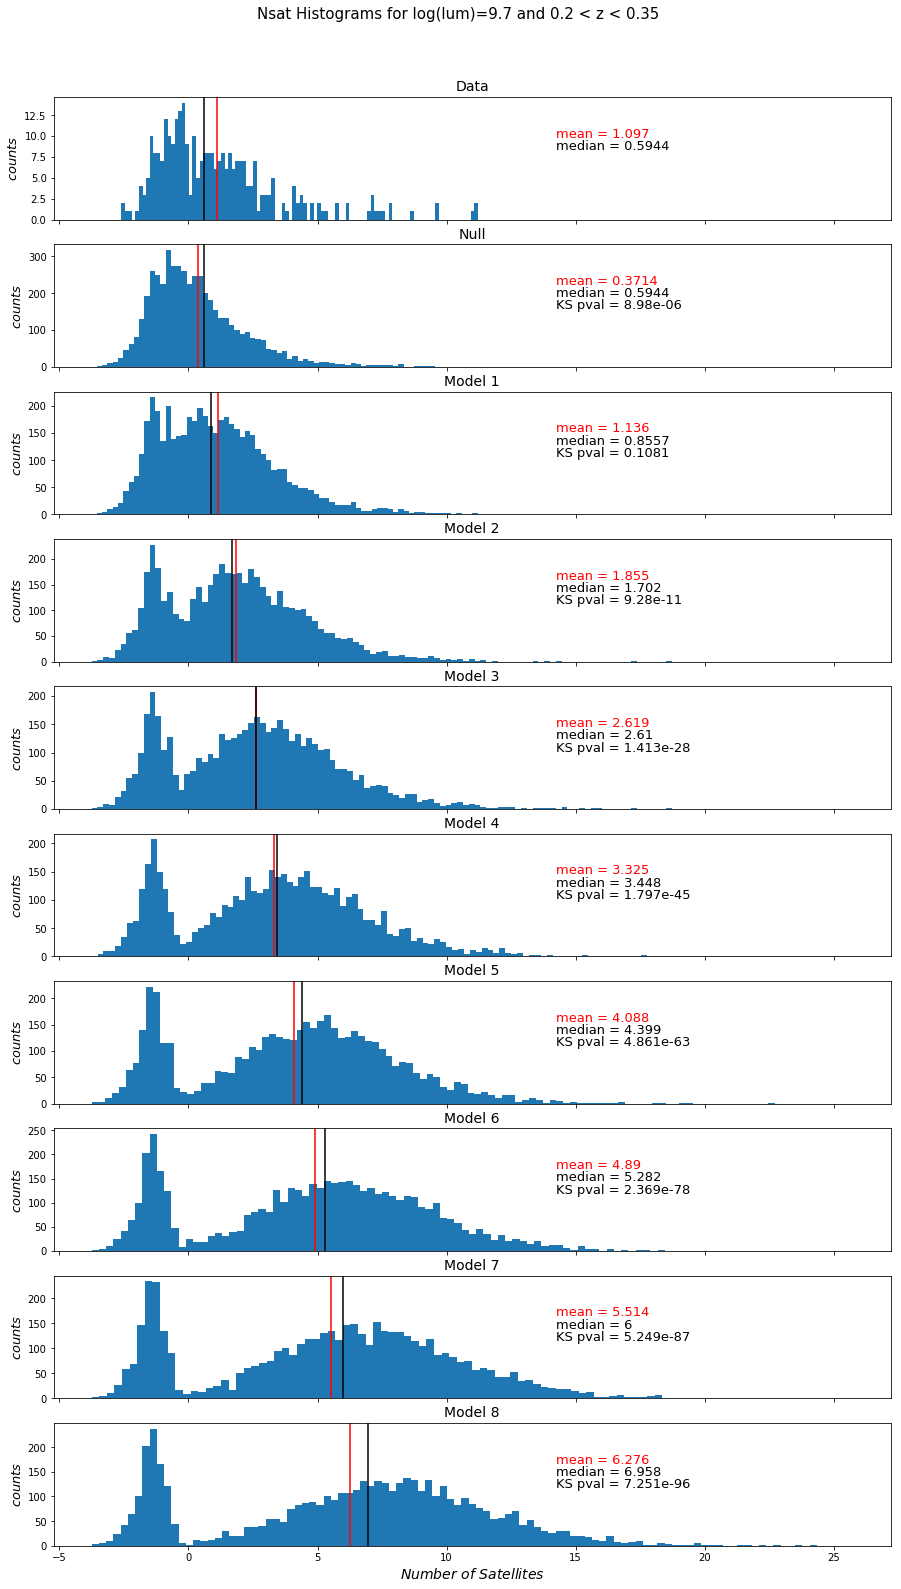

In [17]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10) = plt.subplots(10, 1, figsize=(15,25), sharex=True)
fig.suptitle('Nsat Histograms for log(lum)=9.7 and 0.2 < z < 0.35', fontsize=15)
fig.subplots_adjust(top=0.93)
ax1.hist(low_sum35, bins=100)
ax1.set_title('Data', fontsize=14)
# ax1.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=14)
ax1.set_ylabel(r'$counts$', fontsize=13)
ax1.axvline(x=low_mean35, color='r')
ax1.axvline(x=low_median35, color='black')
ax1.text(0.6, 0.7, 'mean = {0:.4g}'.format(low_mean35), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13, color='r')
ax1.text(0.6, 0.6, 'median = {0:.4g}'.format(low_median35), horizontalalignment='left', verticalalignment='center', transform=ax1.transAxes, fontsize=13)

ax2.hist(null_sum35, bins=100)
ax2.set_title('Null', fontsize=14)
# ax2.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=14)
ax2.set_ylabel(r'$counts$', fontsize=13)
ax2.axvline(x=null_mean35, color='r')
ax2.axvline(x=null_median35, color='black')
ax2.text(0.6, 0.7, 'mean = {0:.4g}'.format(null_mean35), horizontalalignment='left', verticalalignment='center', transform=ax2.transAxes, fontsize=13, color='r')
ax2.text(0.6, 0.6, 'median = {0:.4g}'.format(null_median35), horizontalalignment='left', verticalalignment='center', transform=ax2.transAxes, fontsize=13)
ax2.text(0.6, 0.5, 'KS pval = {0:.4g}'.format(pval35), horizontalalignment='left', verticalalignment='center', transform=ax2.transAxes, fontsize=13)


ax3.hist(low_sum35_mod1, bins=100)
ax3.set_title('Model 1', fontsize=14)
# ax3.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=14)
ax3.set_ylabel(r'$counts$', fontsize=13)
ax3.axvline(x=low_mean35_mod1, color='r')
ax3.axvline(x=low_median35_mod1, color='black')
ax3.text(0.6, 0.7, 'mean = {0:.4g}'.format(low_mean35_mod1), horizontalalignment='left', verticalalignment='center', transform=ax3.transAxes, fontsize=13, color='r')
ax3.text(0.6, 0.6, 'median = {0:.4g}'.format(low_median35_mod1), horizontalalignment='left', verticalalignment='center', transform=ax3.transAxes, fontsize=13)
ax3.text(0.6, 0.5, 'KS pval = {0:.4g}'.format(pval35_1), horizontalalignment='left', verticalalignment='center', transform=ax3.transAxes, fontsize=13)

ax4.hist(low_sum35_mod2, bins=100)
ax4.set_title('Model 2', fontsize=14)
# ax4.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=14)
ax4.set_ylabel(r'$counts$', fontsize=13)
ax4.axvline(x=low_mean35_mod2, color='r')
ax4.axvline(x=low_median35_mod2, color='black')
ax4.text(0.6, 0.7, 'mean = {0:.4g}'.format(low_mean35_mod2), horizontalalignment='left', verticalalignment='center', transform=ax4.transAxes, fontsize=13, color='r')
ax4.text(0.6, 0.6, 'median = {0:.4g}'.format(low_median35_mod2), horizontalalignment='left', verticalalignment='center', transform=ax4.transAxes, fontsize=13)
ax4.text(0.6, 0.5, 'KS pval = {0:.4g}'.format(pval35_2), horizontalalignment='left', verticalalignment='center', transform=ax4.transAxes, fontsize=13)


ax5.hist(low_sum35_mod3, bins=100)
ax5.set_title('Model 3', fontsize=14)
# ax5.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=14)
ax5.set_ylabel(r'$counts$', fontsize=13)
ax5.axvline(x=low_mean35_mod3, color='r')
ax5.axvline(x=low_median35_mod3, color='black')
ax5.text(0.6, 0.7, 'mean = {0:.4g}'.format(low_mean35_mod3), horizontalalignment='left', verticalalignment='center', transform=ax5.transAxes, fontsize=13, color='r')
ax5.text(0.6, 0.6, 'median = {0:.4g}'.format(low_median35_mod3), horizontalalignment='left', verticalalignment='center', transform=ax5.transAxes, fontsize=13)
ax5.text(0.6, 0.5, 'KS pval = {0:.4g}'.format(pval35_3), horizontalalignment='left', verticalalignment='center', transform=ax5.transAxes, fontsize=13)

ax6.hist(low_sum35_mod4, bins=100)
ax6.set_title('Model 4', fontsize=14)
# ax6.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=14)
ax6.set_ylabel(r'$counts$', fontsize=13)
ax6.axvline(x=low_mean35_mod4, color='r')
ax6.axvline(x=low_median35_mod4, color='black')
ax6.text(0.6, 0.7, 'mean = {0:.4g}'.format(low_mean35_mod4), horizontalalignment='left', verticalalignment='center', transform=ax6.transAxes, fontsize=13, color='r')
ax6.text(0.6, 0.6, 'median = {0:.4g}'.format(low_median35_mod4), horizontalalignment='left', verticalalignment='center', transform=ax6.transAxes, fontsize=13)
ax6.text(0.6, 0.5, 'KS pval = {0:.4g}'.format(pval35_4), horizontalalignment='left', verticalalignment='center', transform=ax6.transAxes, fontsize=13)

ax7.hist(low_sum35_mod5, bins=100)
ax7.set_title('Model 5', fontsize=14)
# ax7.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=14)
ax7.set_ylabel(r'$counts$', fontsize=13)
ax7.axvline(x=low_mean35_mod5, color='r')
ax7.axvline(x=low_median35_mod5, color='black')
ax7.text(0.6, 0.7, 'mean = {0:.4g}'.format(low_mean35_mod5), horizontalalignment='left', verticalalignment='center', transform=ax7.transAxes, fontsize=13, color='r')
ax7.text(0.6, 0.6, 'median = {0:.4g}'.format(low_median35_mod5), horizontalalignment='left', verticalalignment='center', transform=ax7.transAxes, fontsize=13)
ax7.text(0.6, 0.5, 'KS pval = {0:.4g}'.format(pval35_5), horizontalalignment='left', verticalalignment='center', transform=ax7.transAxes, fontsize=13)

ax8.hist(low_sum35_mod6, bins=100)
ax8.set_title('Model 6', fontsize=14)
# ax8.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=14)
ax8.set_ylabel(r'$counts$', fontsize=13)
ax8.axvline(x=low_mean35_mod6, color='r')
ax8.axvline(x=low_median35_mod6, color='black')
ax8.text(0.6, 0.7, 'mean = {0:.4g}'.format(low_mean35_mod6), horizontalalignment='left', verticalalignment='center', transform=ax8.transAxes, fontsize=13, color='r')
ax8.text(0.6, 0.6, 'median = {0:.4g}'.format(low_median35_mod6), horizontalalignment='left', verticalalignment='center', transform=ax8.transAxes, fontsize=13)
ax8.text(0.6, 0.5, 'KS pval = {0:.4g}'.format(pval35_6), horizontalalignment='left', verticalalignment='center', transform=ax8.transAxes, fontsize=13)

ax9.hist(low_sum35_mod7, bins=100)
ax9.set_title('Model 7', fontsize=14)
# ax9.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=14)
ax9.set_ylabel(r'$counts$', fontsize=13)
ax9.axvline(x=low_mean35_mod7, color='r')
ax9.axvline(x=low_median35_mod7, color='black')
ax9.text(0.6, 0.7, 'mean = {0:.4g}'.format(low_mean35_mod7), horizontalalignment='left', verticalalignment='center', transform=ax9.transAxes, fontsize=13, color='r')
ax9.text(0.6, 0.6, 'median = {0:.4g}'.format(low_median35_mod7), horizontalalignment='left', verticalalignment='center', transform=ax9.transAxes, fontsize=13)
ax9.text(0.6, 0.5, 'KS pval = {0:.4g}'.format(pval35_7), horizontalalignment='left', verticalalignment='center', transform=ax9.transAxes, fontsize=13)

ax10.hist(low_sum35_mod8, bins=100)
ax10.set_title('Model 8', fontsize=14)
ax10.set_xlabel(r'$Number$ $of$ $Satellites$', fontsize=14)
ax10.set_ylabel(r'$counts$', fontsize=13)
ax10.axvline(x=low_mean35_mod8, color='r')
ax10.axvline(x=low_median35_mod8, color='black')
ax10.text(0.6, 0.7, 'mean = {0:.4g}'.format(low_mean35_mod8), horizontalalignment='left', verticalalignment='center', transform=ax10.transAxes, fontsize=13, color='r')
ax10.text(0.6, 0.6, 'median = {0:.4g}'.format(low_median35_mod8), horizontalalignment='left', verticalalignment='center', transform=ax10.transAxes, fontsize=13)
ax10.text(0.6, 0.5, 'KS pval = {0:.4g}'.format(pval35_8), horizontalalignment='left', verticalalignment='center', transform=ax10.transAxes, fontsize=13)

plt.savefig('/Users/mtownsend/Desktop/MeetingPlots/11Dec2020/lowz35_comparison.pdf')

plt.show()